# Allianz Graduate Assessment Day Question Sheet

## Welcome to the Allianz Graduate assessment day 2024!

Allianz are considering purchasing a multi-dealership vehicle sales business called CarXpress but before we go ahead with the investment, our leadership team have asked us to take a look at the business's last year of sales. They want to know:

If the information CarXpress have shared in their data pack is truthful and accurate.
1. How much it could cost to stock each dealership.
2. Which petrol car is the current bestseller.
3. If we can use machine learning to lower our risk of recalls.
4. The data engineering team have kindly extracted some data, but it's up to you to analyse the data and provide insight. The challenge has been broken up in **5 tasks** that are all worth different points **[these are shown in square brackets throughout]**.

Be sure to make use of the hints and links provided, and **document your thoughts and code throughout** to pick up the points for clarity of execution.

## Q1 Read in CSV
Pandas is a powerful, flexible and easy-to-use open source data analysis and manipulation tool, and we use it a lot for data exploration. Using Pandas, please **read in the 3** CSV files into Pandas DataFrames as named below, and **print the shape** of them:

#### 1. sites.csv : `sites_df`
* Basic geographical and personnel information about each of called CarXpress' dealerships.
#### 2. sales.csv : `sales_df`
* A record of the number of vehicles of each type sold at each dealership in 2023.
#### 3. vehicles.csv : `vehicles_df`
* Descriptive information about vehicles.

_[4 points: 0.5 points per DataFrame loaded, 0.5 points per DataFame shape printed, 1 point for clarity of execution]_

Feel free to add additional cells to familiarise yourself with the data.

## Q2. Check data pack is correct
The sales pack our leadership was given states that there are **4 sites** that sold a combined **90,000 vehicles in 2023** worth **£1,900,000,000**.

1. Using `DataFrame.head()` find which DataFrames have the data for this question. _[1 point]_
2. Using `Series.nunique()` find the number of sites we have data for. _[1 point]_
3. Using `Series.sum()` find the total number of vehicles sold. _[1 point]_
4. By making a new column and again using `Series.sum()`, calculate the total value of the sales (in £). _[1 point]_
5. Was the data pack provided accurate? _[1 point]_

_[ 6 points: 1 point for clarity of execution]_

## Q3. Calculate cost to stock sites
If Allianz did purchase this CarXpress, how many vehicles would we need to fill each dealership to capacity?

Please estimate what would it cost (in £) at each site. (Assume that stock at the time of purchase is 0)

**Hint**: you can use `DataFrame.groupby()` and `DataFrame.agg()` to find the mean selling price at each dealership.

_[5 points: 3 method points, 2 for correct answers]_

## Q4. Which petrol vehicle was sold the most?
1. By joining together `sales_df` and `vehicles_df`, find the make-model combination that has sold the most units. _[3 points]_
2. Now find what percentage of these sales were for petrol and diesel vehicles. _[2 points]_
3. Using your result from part ii. create a plot that visualises the split of petrol and diesel sales. _[2 points]_

**HINT**: For part i. you'll need to make use of `DataFrame.join()`. For part 3. you'll need to use `matplotlib`, which has been imported as `plt`, and `pandas` has it's own plotting methods too.

_[8 points: 7 for correct answers. 1 point for clarity of execution]_

## Q5. Risk of recall
In `vehicles_df` there is a column called `recalled`. This indicates if this model has any outstanding recalls from the manufacturer that need to be dealt with.

If Allianz were to buy CarXpress, we wouldn't want to sell cars that are likely to be recalled. The board wants to know if recalls can be predicted, and thus avoided before they go ahead with the purchase.

Another data scientist has built a model that uses previous sales and recall data to predict recalls. They have given you their code to review before they call the board to give them the good news.

Review the code and then answer the questions below it. _[17 points]_

In [1]:
# 1. load pre-joined data (sales_df, vehicles_df) and check target
import pandas as pd
data = pd.read_csv('model_data.csv')

print('Target\n',data['recalled'].value_counts())

Target
 recalled
0.0    19083
1.0      916
Name: count, dtype: int64


In [2]:
# 2. Drop any rows with missing values
print(data.isna().sum())
data.dropna(inplace=True)

Unnamed: 0           0
site_id              0
vehicle_id           0
price                0
volume               0
row_value            0
make                 1
model                1
manfyear             2
fuel_type            1
transmission_type    1
recalled             1
dtype: int64


In [3]:
# Import scikit learn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 3. Define categorical and numerical columns to be used in model
categorical_columns = ['site_id', 'vehicle_id', 'make', 'model', 'fuel_type', 'transmission_type']
numerical_columns = ['price', 'volume', 'manfyear']

# 4. Split data into train and test
X = data.drop('recalled', axis=1)
y = data['recalled']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 5. Create feature processing steps
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns),
    
])

# 6. Make pipeline
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

# 7. train model
model_trained = model.fit(X_train, y_train)

Train score: 0.9822643019069209
Test score: 0.9668 



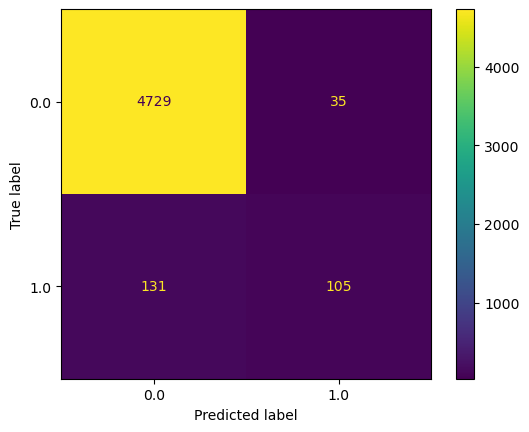

In [4]:
# Import functions to get metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 8. score model
print("Train score:", model_trained.score(X_train, y_train))
print("Test score:", model_trained.score(X_test, y_test), '\n')

# 9. Confusion matrix
y_pred = model_trained.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model_trained.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_trained.classes_)
disp.plot();

In [5]:
# 10. Look at feature coefficients
coef = model_trained.steps[1][1].coef_
features = model_trained.steps[0][1].get_feature_names_out()

print("There are {len(features)} features in the model.")

feature_coef = pd.DataFrame(zip(features, coef[0]), columns=['features', 'coef'])
print(feature_coef.sort_values('coef').head(5), '\n')

print(feature_coef.sort_values('coef').tail(5))

There are {len(features)} features in the model.
                                                features      coef
21388                          standard_scaler__manfyear -3.783532
12018                  one-hot-encoder__vehicle_id_66360 -1.557543
21134     one-hot-encoder__model_XJ-S V12 6.0 COUPE AUTO -1.557543
18576  one-hot-encoder__model_LANDCRUISER PRADO TD AU... -1.428065
16369                one-hot-encoder__model_CIVIC HAWAII -1.133123 

                                                features      coef
1664                    one-hot-encoder__vehicle_id_9005  1.215473
5549                   one-hot-encoder__vehicle_id_30200  1.237606
20342  one-hot-encoder__model_T220 CONNECT TDI (75) L...  1.237606
19976              one-hot-encoder__model_S60 S D5 (163)  1.409291
4363                   one-hot-encoder__vehicle_id_23478  1.409291


## Questions :
1. Is this a supervised or upsupervised learning problem? _[1 point]_
2. What can you say about the target, `recalled`? _[2 points]_
3. What else could have been done with the missing values in **step 2**? _[1 point]_
4. Summarise what is being achieved in **step 5**. Give one potential improvement. _[3 points]_
5. In **step 8** to **step 9**, the data scientist is checking performance. Calculate the precision and recall from the confusion matrix and comment on the model's performance. _[4 points]_

$Precision = \frac{True~Positives}{\left ( True~Positives + False~Positives \right )}$

$Recall = \frac{True~Positives}{\left ( True~Positives + False~Negatives\right )}$

6. What do the feature coefficients in **step 10** tell us about vehicles likely to be recalled and the models features? _[2 points]_
7. Why do you think improving the rate of recall is important if the manufacturer's pay for the work anyway? Do you think this model could lower the rate of recall? _[4 points]_

## Q6. Daily Sales (Bonus)
A last minute request has come in to visualise the daily sales at **site one** and estimate the number of staff needed to ensure all sales can take place smoothly.

In addition, the board would like to know the annual cost of permanent staff.

1. Using `daily_sales.csv` isolate the sales for site one, and visualise the sales count as a time series. _[3 points]_
2. Calculate the median number of daily sales at site one and mark it on the visualisation. _[1 point]_
3. We would need enough perment staff to complete sales on a median sales day. A permanent sales associate can handle **5** sales a day. Assuming staff work **7** days a week, how many permenent staff might we need? _[1 point]_
4. How many day's a year would the permanent staff be able to meet the demand? _[1 point]_
5. A temporary sales associate works **7** days a week but only handles **4** sales a day. On our busiest day, how many additional staff would we need? What day of the year is this? _[2 points]_
6. Permenent staff are paid **£115/day** ususally, and paid **£140/day** when there are temporary staff to support. What is the annual cost of permenent staff? _[1 point]_

_[10 points: 9 for correct answers, 1 for execution]_